# <center>Hyperplay Backtracking Depth Investigation</center>

This file is an interactive notebook to analyze the data obtained from tests.<br>
The purpose of this notebook is to examine how greater backtracking improves the game. I suspect there will be a tradeoff between time and accuracy.

The game blind_breakthrough will be used since this seems to be the game the original hyperplay model performed the best at.


## Reading in the Data

First the match data must be read in.
I will be reading in data obtained for a series of games where a hyperplayer with 32x32 resources competed against a CHEAT player who had access to the true state and was allowed 16 simulations per move.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
np.random.seed(42)

# Read in the csv files
numNames = ['0backtrackDepth', '1backtrackDepth', '2backtrackDepth', '4backtrackDepth', '8backtrackDepth', '16backtrackDepth', '999backtrackDepth']
data = list()

for idx, name in enumerate(numNames):
    file_name = 'C:/Users/Michael/VirtualBox VMs/Shared/output/blind_breakthrough_6x6/backtrack_depth/' + name + '/testOutput.csv'
    data.append(pd.DataFrame)
    data[idx] = pd.read_csv(file_name, header=0)

# Print the first 5 rows of the data
for game in data:
    display(game.head())

,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,2,1598325434186,10,300,WHITE,25,white,AHYPERLT,100,black,CHEAT,0
1,blind_breakthrough_6x6_CHEAT_0backDepth_1,blind_breakthrough_6x6_CHEAT,2,1598325504304,10,300,WHITE,10,white,AHYPERLT,0,black,CHEAT,100
2,blind_breakthrough_6x6_CHEAT_0backDepth_2,blind_breakthrough_6x6_CHEAT,2,1598325587510,10,300,WHITE,12,white,AHYPERLT,0,black,CHEAT,100
3,blind_breakthrough_6x6_CHEAT_0backDepth_3,blind_breakthrough_6x6_CHEAT,2,1598325849952,10,300,WHITE,38,white,AHYPERLT,0,black,CHEAT,100
4,blind_breakthrough_6x6_CHEAT_0backDepth_4,blind_breakthrough_6x6_CHEAT,2,1598326039732,10,300,WHITE,20,white,AHYPERLT,0,black,CHEAT,100


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,2,1598325292566,10,300,WHITE,9,white,AHYPERLT,100,black,CHEAT,0
1,blind_breakthrough_6x6_CHEAT_1backDepth_1,blind_breakthrough_6x6_CHEAT,2,1598325561325,10,300,WHITE,37,white,AHYPERLT,100,black,CHEAT,0
2,blind_breakthrough_6x6_CHEAT_1backDepth_2,blind_breakthrough_6x6_CHEAT,2,1598325842661,10,300,WHITE,36,white,AHYPERLT,0,black,CHEAT,100
3,blind_breakthrough_6x6_CHEAT_1backDepth_3,blind_breakthrough_6x6_CHEAT,2,1598326072738,10,300,WHITE,23,white,AHYPERLT,100,black,CHEAT,0
4,blind_breakthrough_6x6_CHEAT_1backDepth_4,blind_breakthrough_6x6_CHEAT,2,1598326241367,10,300,WHITE,43,white,AHYPERLT,100,black,CHEAT,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,2,1598325309720,10,300,WHITE,10,white,AHYPERLT,0,black,CHEAT,100
1,blind_breakthrough_6x6_CHEAT_2backDepth_1,blind_breakthrough_6x6_CHEAT,2,1598325493136,10,300,WHITE,33,white,AHYPERLT,100,black,CHEAT,0
2,blind_breakthrough_6x6_CHEAT_2backDepth_2,blind_breakthrough_6x6_CHEAT,2,1598325731406,10,300,WHITE,43,white,AHYPERLT,100,black,CHEAT,0
3,blind_breakthrough_6x6_CHEAT_2backDepth_3,blind_breakthrough_6x6_CHEAT,2,1598325935440,10,300,WHITE,36,white,AHYPERLT,0,black,CHEAT,100
4,blind_breakthrough_6x6_CHEAT_2backDepth_4,blind_breakthrough_6x6_CHEAT,2,1598326224480,10,300,WHITE,42,white,AHYPERLT,0,black,CHEAT,100


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,2,1598325332952,10,300,WHITE,21,white,AHYPERLT,100,black,CHEAT,0
1,blind_breakthrough_6x6_CHEAT_4backDepth_1,blind_breakthrough_6x6_CHEAT,2,1598325520790,10,300,WHITE,31,white,AHYPERLT,100,black,CHEAT,0
2,blind_breakthrough_6x6_CHEAT_4backDepth_2,blind_breakthrough_6x6_CHEAT,2,1598325664779,10,300,WHITE,44,white,AHYPERLT,0,black,CHEAT,100
3,blind_breakthrough_6x6_CHEAT_4backDepth_3,blind_breakthrough_6x6_CHEAT,2,1598325838235,10,300,WHITE,35,white,AHYPERLT,100,black,CHEAT,0
4,blind_breakthrough_6x6_CHEAT_4backDepth_4,blind_breakthrough_6x6_CHEAT,2,1598325947188,10,300,WHITE,22,white,AHYPERLT,0,black,CHEAT,100


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,2,1598325536310,10,300,WHITE,29,white,AHYPERLT,100,black,CHEAT,0
1,blind_breakthrough_6x6_CHEAT_8backDepth_1,blind_breakthrough_6x6_CHEAT,2,1598325787968,10,300,WHITE,32,white,AHYPERLT,0,black,CHEAT,100
2,blind_breakthrough_6x6_CHEAT_8backDepth_2,blind_breakthrough_6x6_CHEAT,2,1598326062370,10,300,WHITE,35,white,AHYPERLT,100,black,CHEAT,0
3,blind_breakthrough_6x6_CHEAT_8backDepth_3,blind_breakthrough_6x6_CHEAT,2,1598326273523,10,300,WHITE,32,white,AHYPERLT,0,black,CHEAT,100
4,blind_breakthrough_6x6_CHEAT_8backDepth_4,blind_breakthrough_6x6_CHEAT,2,1598326559392,10,300,WHITE,40,white,AHYPERLT,50,black,CHEAT,50


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,2,1598325561565,10,300,WHITE,37,white,AHYPERLT,100,black,CHEAT,0
1,blind_breakthrough_6x6_CHEAT_16backDepth_1,blind_breakthrough_6x6_CHEAT,2,1598325808295,10,300,WHITE,34,white,AHYPERLT,0,black,CHEAT,100
2,blind_breakthrough_6x6_CHEAT_16backDepth_2,blind_breakthrough_6x6_CHEAT,2,1598326117345,10,300,WHITE,33,white,AHYPERLT,100,black,CHEAT,0
3,blind_breakthrough_6x6_CHEAT_16backDepth_3,blind_breakthrough_6x6_CHEAT,2,1598326500626,10,300,WHITE,47,white,AHYPERLT,100,black,CHEAT,0
4,blind_breakthrough_6x6_CHEAT_16backDepth_4,blind_breakthrough_6x6_CHEAT,2,1598326800383,10,300,WHITE,39,white,AHYPERLT,100,black,CHEAT,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,2,1598325428988,10,300,WHITE,30,white,AHYPERLT,0,black,CHEAT,100
1,blind_breakthrough_6x6_CHEAT_999backDepth_1,blind_breakthrough_6x6_CHEAT,2,1598325702078,10,300,WHITE,39,white,AHYPERLT,100,black,CHEAT,0
2,blind_breakthrough_6x6_CHEAT_999backDepth_2,blind_breakthrough_6x6_CHEAT,2,1598325909913,10,300,WHITE,21,white,AHYPERLT,100,black,CHEAT,0
3,blind_breakthrough_6x6_CHEAT_999backDepth_3,blind_breakthrough_6x6_CHEAT,2,1598326090219,10,300,WHITE,25,white,AHYPERLT,100,black,CHEAT,0
4,blind_breakthrough_6x6_CHEAT_999backDepth_4,blind_breakthrough_6x6_CHEAT,2,1598326261673,10,300,WHITE,21,white,AHYPERLT,100,black,CHEAT,0


Next, the move data should be read in for each match

*Note: time_to_update and time_to_select_move are in milliseconds*

In [2]:
move_list_games = list()
for idx, name in enumerate(numNames):
    file_name_prefix = 'C:/Users/Michael/VirtualBox VMs/Shared/output/blind_breakthrough_6x6/backtrack_depth/' + name + '/moveset/'
    temp_move_list = list()
    for match_name in data[idx]['match_id']:
        file_name = file_name_prefix + match_name + '.csv'
        temp_move_list.append(pd.read_csv(file_name, names=['match_id','game_name','step','role_name','player_name','count_hypergames','num_probes','time_to_update','time_to_select_move','move_chosen','last_move_illegal','numTimesMovesSimulated','numTimesHypergameForward']))

    move_list_games.append(temp_move_list)

# Verify by printing the head of the first game
for move_list in move_list_games:
    display(move_list[0])

,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen,last_move_illegal,numTimesMovesSimulated,numTimesHypergameForward
0,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,0,BLACK,cheat,1,16,21,3386,NOOP,False,15,0
1,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,0,WHITE,ahyperlt,1,8,41,6017,(MOVE 3 2 3 3 ),False,48,0
2,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,1,WHITE,ahyperlt,1,8,13,0,NOOP,False,0,1
3,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,1,BLACK,cheat,1,16,17,6921,(MOVE 2 5 2 4 ),False,90,2
4,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,2,BLACK,cheat,1,16,3,1710,NOOP,False,15,1
5,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,2,WHITE,ahyperlt,1,8,43,5048,(MOVE 3 3 2 4 ),False,64,8
6,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,3,WHITE,ahyperlt,1,8,23,0,NOOP,False,0,6
7,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,3,BLACK,cheat,1,16,34,7299,(MOVE 1 5 2 4 ),False,120,6
8,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,4,BLACK,cheat,1,16,1,1875,NOOP,False,15,1
9,blind_breakthrough_6x6_CHEAT_0backDepth_0,blind_breakthrough_6x6_CHEAT,4,WHITE,ahyperlt,1,8,68,4057,(MOVE 6 2 6 3 ),False,48,17


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen,last_move_illegal,numTimesMovesSimulated,numTimesHypergameForward
0,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,0,BLACK,cheat,1,16,14,3379,NOOP,False,15,0
1,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,0,WHITE,ahyperlt,1,8,37,5438,(MOVE 5 2 5 3 ),False,48,0
2,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,1,WHITE,ahyperlt,1,8,5,0,NOOP,False,0,1
3,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,1,BLACK,cheat,1,16,24,5394,(MOVE 4 5 4 4 ),False,90,3
4,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,2,BLACK,cheat,1,16,7,1741,NOOP,False,15,1
5,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,2,WHITE,ahyperlt,1,8,42,4496,(MOVE 5 3 5 4 ),False,64,9
6,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,3,WHITE,ahyperlt,1,8,17,0,NOOP,False,0,5
7,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,3,BLACK,cheat,1,16,25,5238,(MOVE 2 5 2 4 ),False,105,6
8,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,4,BLACK,cheat,1,16,4,1341,NOOP,False,15,1
9,blind_breakthrough_6x6_CHEAT_1backDepth_0,blind_breakthrough_6x6_CHEAT,4,WHITE,ahyperlt,3,8,97,8450,(MOVE 2 2 2 3 ),False,168,21


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen,last_move_illegal,numTimesMovesSimulated,numTimesHypergameForward
0,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,0,BLACK,cheat,1,16,21,3137,NOOP,False,15,0
1,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,0,WHITE,ahyperlt,1,8,22,5139,(MOVE 4 2 4 3 ),False,48,0
2,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,1,WHITE,ahyperlt,1,8,4,0,NOOP,False,0,1
3,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,1,BLACK,cheat,1,16,9,5324,(MOVE 5 5 5 4 ),False,90,1
4,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,2,BLACK,cheat,1,16,1,1817,NOOP,False,15,1
5,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,2,WHITE,ahyperlt,1,8,40,4451,(MOVE 6 2 6 3 ),False,64,9
6,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,3,WHITE,ahyperlt,1,8,17,0,NOOP,False,0,6
7,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,3,BLACK,cheat,1,16,14,6513,(MOVE 2 5 2 4 ),False,135,2
8,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,4,BLACK,cheat,1,16,7,1458,NOOP,False,15,1
9,blind_breakthrough_6x6_CHEAT_2backDepth_0,blind_breakthrough_6x6_CHEAT,4,WHITE,ahyperlt,5,8,136,18714,(MOVE 4 3 4 4 ),False,384,27


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen,last_move_illegal,numTimesMovesSimulated,numTimesHypergameForward
0,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,0,BLACK,cheat,1,16,5,3657,NOOP,False,15,0
1,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,0,WHITE,ahyperlt,1,8,28,5602,(MOVE 3 2 3 3 ),False,48,0
2,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,1,WHITE,ahyperlt,1,8,10,0,NOOP,False,0,1
3,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,1,BLACK,cheat,1,16,15,5853,(MOVE 2 5 2 4 ),False,90,1
4,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,2,BLACK,cheat,1,16,4,1889,NOOP,False,15,1
5,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,2,WHITE,ahyperlt,1,8,38,4617,(MOVE 3 1 3 2 ),False,64,9
6,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,3,WHITE,ahyperlt,1,8,19,0,NOOP,False,0,6
7,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,3,BLACK,cheat,1,16,39,6385,(MOVE 2 4 2 3 ),False,120,8
8,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,4,BLACK,cheat,1,16,3,1548,NOOP,False,15,1
9,blind_breakthrough_6x6_CHEAT_4backDepth_0,blind_breakthrough_6x6_CHEAT,4,WHITE,ahyperlt,1,8,64,3305,(MOVE 4 2 4 3 ),False,56,15


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen,last_move_illegal,numTimesMovesSimulated,numTimesHypergameForward
0,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,0,BLACK,cheat,1,16,6,3269,NOOP,False,15,0
1,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,0,WHITE,ahyperlt,1,8,27,5923,(MOVE 5 2 5 3 ),False,48,0
2,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,1,WHITE,ahyperlt,1,8,14,0,NOOP,False,0,1
3,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,1,BLACK,cheat,1,16,27,6898,(MOVE 2 5 2 4 ),False,90,5
4,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,2,BLACK,cheat,1,16,5,2024,NOOP,False,15,1
5,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,2,WHITE,ahyperlt,4,8,59,16249,(MOVE 5 1 5 2 ),False,224,12
6,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,3,WHITE,ahyperlt,4,8,39,0,NOOP,False,0,15
7,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,3,BLACK,cheat,1,16,42,6848,(MOVE 3 5 3 4 ),False,105,7
8,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,4,BLACK,cheat,1,16,2,2100,NOOP,False,15,1
9,blind_breakthrough_6x6_CHEAT_8backDepth_0,blind_breakthrough_6x6_CHEAT,4,WHITE,ahyperlt,8,8,139,23833,(MOVE 3 2 3 3 ),False,368,23


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen,last_move_illegal,numTimesMovesSimulated,numTimesHypergameForward
0,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,0,BLACK,cheat,1,16,13,3315,NOOP,False,15,0
1,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,0,WHITE,ahyperlt,1,8,22,5774,(MOVE 6 2 6 3 ),False,48,0
2,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,1,WHITE,ahyperlt,1,8,9,0,NOOP,False,0,1
3,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,1,BLACK,cheat,1,16,21,6323,(MOVE 3 5 3 4 ),False,90,4
4,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,2,BLACK,cheat,1,16,4,1879,NOOP,False,15,1
5,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,2,WHITE,ahyperlt,5,8,67,19663,(MOVE 5 2 5 3 ),False,264,13
6,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,3,WHITE,ahyperlt,5,8,52,0,NOOP,False,0,18
7,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,3,BLACK,cheat,1,16,19,6927,(MOVE 2 5 2 4 ),False,105,2
8,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,4,BLACK,cheat,1,16,6,1816,NOOP,False,15,1
9,blind_breakthrough_6x6_CHEAT_16backDepth_0,blind_breakthrough_6x6_CHEAT,4,WHITE,ahyperlt,8,8,286,31689,(MOVE 2 2 2 3 ),False,512,54


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen,last_move_illegal,numTimesMovesSimulated,numTimesHypergameForward
0,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,0,BLACK,cheat,1,16,29,3232,NOOP,False,15,0
1,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,0,WHITE,ahyperlt,1,8,21,5148,(MOVE 6 2 6 3 ),False,48,0
2,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,1,WHITE,ahyperlt,1,8,13,0,NOOP,False,0,1
3,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,1,BLACK,cheat,1,16,21,5357,(MOVE 1 5 1 4 ),False,90,3
4,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,2,BLACK,cheat,1,16,2,1869,NOOP,False,15,1
5,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,2,WHITE,ahyperlt,5,8,67,16714,(MOVE 5 2 5 3 ),False,280,13
6,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,3,WHITE,ahyperlt,5,8,49,0,NOOP,False,0,18
7,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,3,BLACK,cheat,1,16,39,5095,(MOVE 3 5 3 4 ),False,105,7
8,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,4,BLACK,cheat,1,16,5,1767,NOOP,False,15,1
9,blind_breakthrough_6x6_CHEAT_999backDepth_0,blind_breakthrough_6x6_CHEAT,4,WHITE,ahyperlt,8,8,274,24800,(MOVE 5 3 5 4 ),False,512,54


## Analysis of Data

### Overall Agent Results

The average score of the agent will be calculated across all games

The win/draw rate for the agent "AHYPERLT" playing the game "blind_breakthrough_6x6_CHEAT" with 0backtrackDepth probes is 54.00% for 100 games
The win/draw rate for the agent "AHYPERLT" playing the game "blind_breakthrough_6x6_CHEAT" with 1backtrackDepth probes is 56.00% for 100 games
The win/draw rate for the agent "AHYPERLT" playing the game "blind_breakthrough_6x6_CHEAT" with 2backtrackDepth probes is 55.00% for 100 games
The win/draw rate for the agent "AHYPERLT" playing the game "blind_breakthrough_6x6_CHEAT" with 4backtrackDepth probes is 61.00% for 100 games
The win/draw rate for the agent "AHYPERLT" playing the game "blind_breakthrough_6x6_CHEAT" with 8backtrackDepth probes is 61.00% for 100 games
The win/draw rate for the agent "AHYPERLT" playing the game "blind_breakthrough_6x6_CHEAT" with 16backtrackDepth probes is 61.00% for 100 games
The win/draw rate for the agent "AHYPERLT" playing the game "blind_breakthrough_6x6_CHEAT" with 999backtrackDepth probes is 63.00% for 100 ga

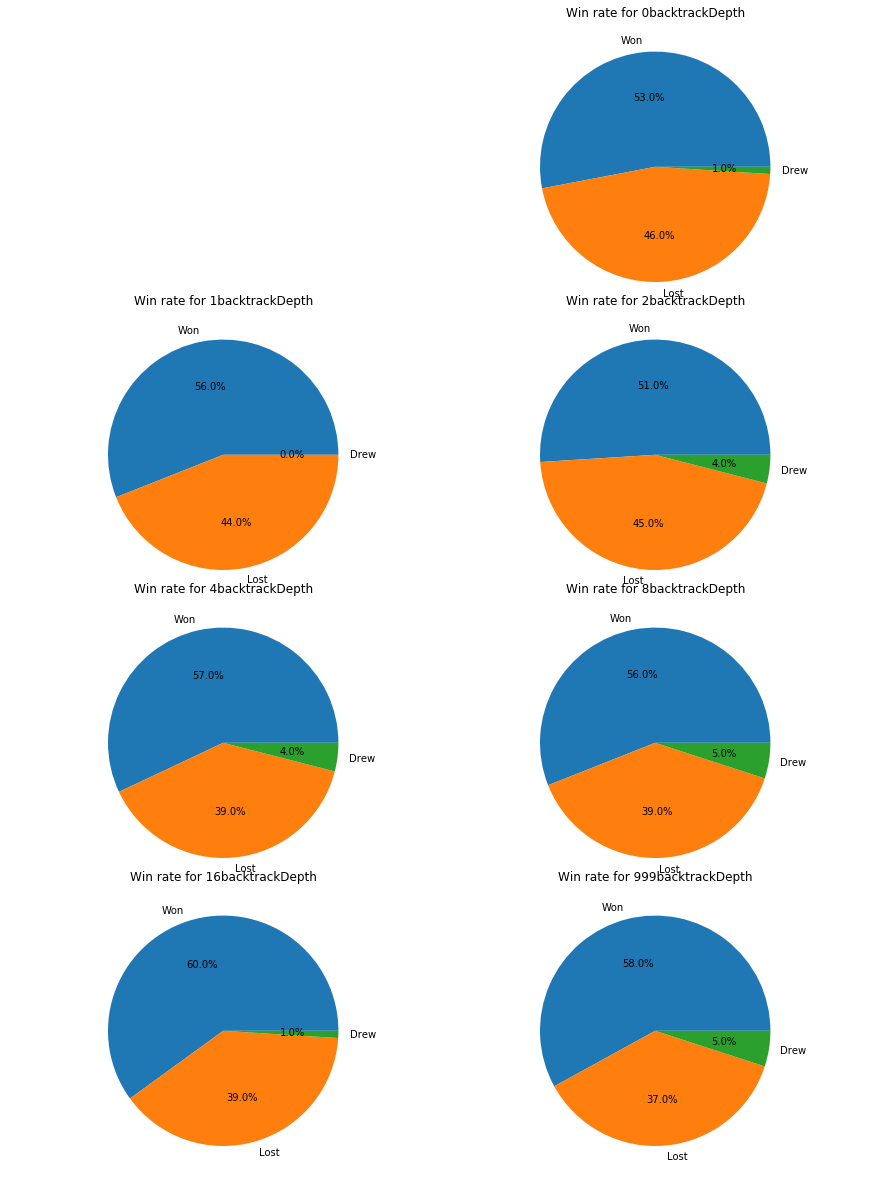

[53.5, 56.0, 53.0, 59.0, 58.5, 60.5, 60.5]

In [4]:
count_games_completed = list()
for idx, game in enumerate(data):
    total_score = data[idx]['player_1_score'][data[idx]['player_1_score'] >= 50].count() * 100
    total_count = len(data[idx]['player_1_score'])
    count_games_completed.append(total_count)
    print(f"The win/draw rate for the agent \"" + str(data[idx]['player_1'][0]) + "\" playing the game \"" + str(data[idx]['game_name'][0]) + "\" with " + str(numNames[idx]) + f" probes is {(total_score/total_count):.2f}% for " + str(total_count) + " games")

# Display a pie chart
fig = plt.figure()
data_len = len(data)
win_count = list()
win_draw_count = list()
score = list()
for idx, game in enumerate(data):
    ax = fig.add_axes([(data_len - idx)%2,math.ceil((data_len - idx)/2),1,1])
    ax.axis('equal')
    ax.set_title('Win rate for ' + str(numNames[idx]))
    result = ['Won', 'Lost', 'Drew']
    game_count = [len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 0)]), len(game[(game['player_1_score'] == 0) & (game['player_2_score'] == 100)]), len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 100)| (game['player_1_score'] == 50) & (game['player_2_score'] == 50)])]
    win_count.append(game_count[0])
    win_draw_count.append(game_count[0] + game_count[2])
    score.append(game_count[0] + (0.5*game_count[2]))
    ax.pie(game_count, labels = result,autopct='%1.1f%%')
plt.show()

score

It is now worth looking into how performance degrades with fewer probes.

First I will consider the number of games that can be completed without error compared to the number of probes.

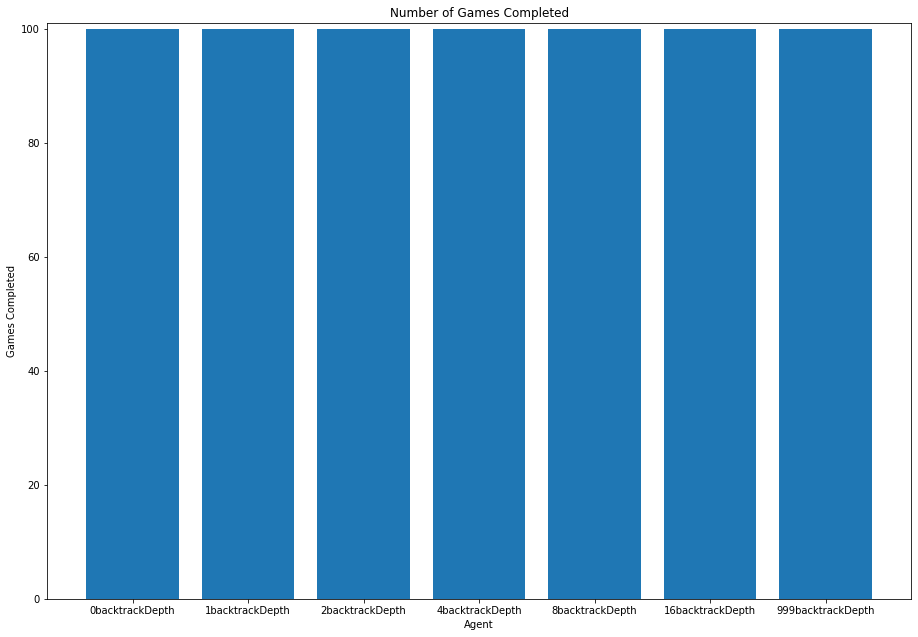

In [5]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2], label='state_update')
ax1.set_title('Number of Games Completed')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Games Completed')
ax1.set_yscale('linear')
ax1.set_ylim([0,101])
ax1.bar(numNames, count_games_completed)
plt.show()

I will now consider whether the number of games won

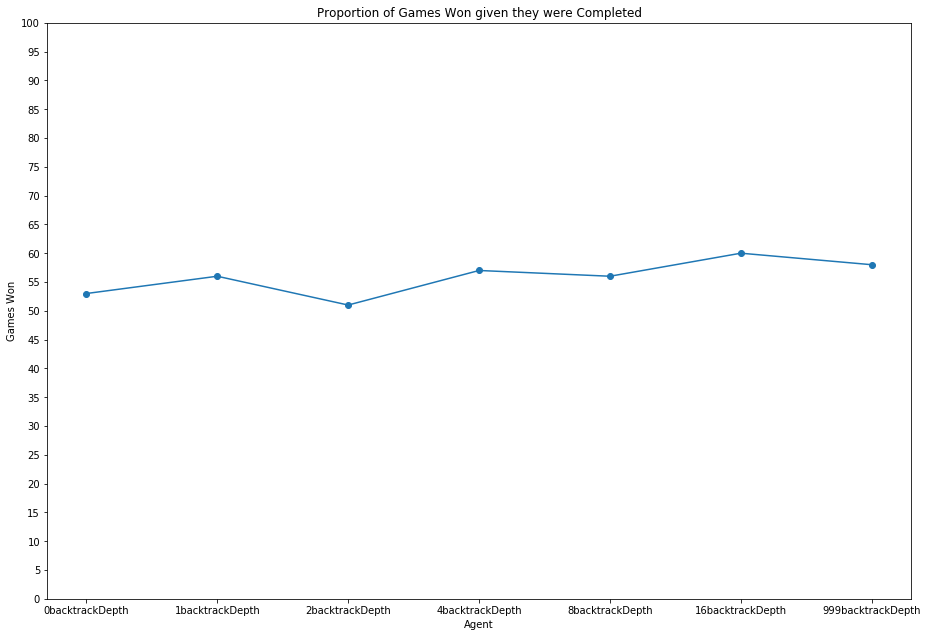

In [6]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Proportion of Games Won given they were Completed')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Games Won')
ax1.set_yscale('linear')
ax1.set_yticks(np.linspace(0, 100, 21))
ax1.set_ylim([0,100])
ax1.plot(numNames, np.divide(win_count,count_games_completed)*100, marker='o')
plt.show()

Therre seems to be some correlation, but it seems quite weak. Some backtracking appears to help, but excessive backtracking may lead to decreased performance.
I suspect that the 2 and 16 are anomalies since they seem far lower than I would expect. Further analysis with >100 tests would help demonstrate this.

It is also worth considering games that ended in a win OR draw

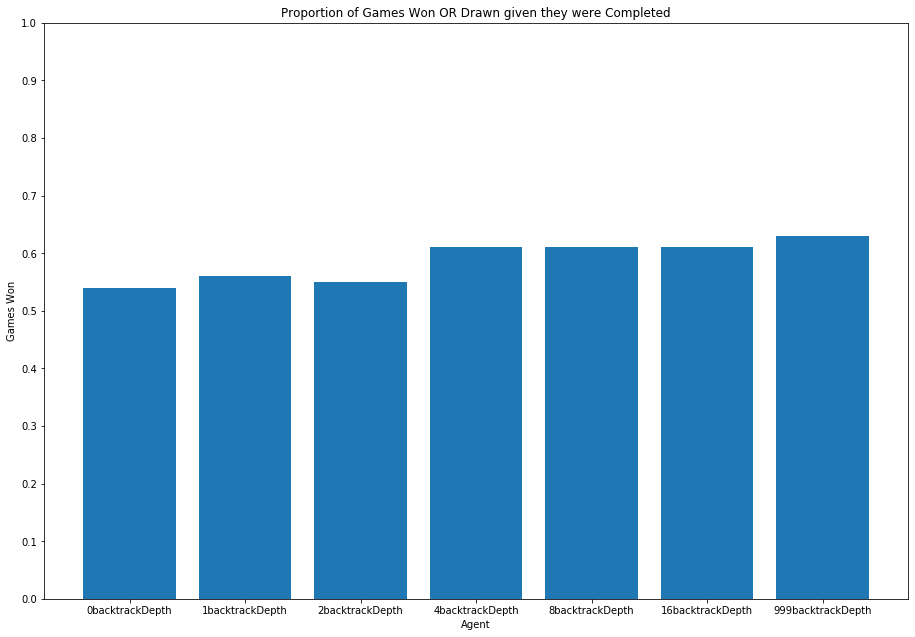

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Proportion of Games Won OR Drawn given they were Completed')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Games Won')
ax1.set_yscale('linear')
ax1.set_yticks(np.linspace(0, 1, 11))
ax1.set_ylim([0,1.0])
ax1.bar(numNames, np.divide(win_draw_count,count_games_completed))
plt.show()

There seems to be a stronger correlation here, but again excessive backtracking appears to be to a disadvantage. I wonder if this is game specific or if a general heuristic on when to stop backtracking can be found?

### Move Results

Calculating the average move time per game.
This is expected to grow with the depth of the game and is expected to be different for the state update and the move selection.

In [8]:
class Tracker:
    '''
    Tracker tracks the average time for each move of each game played
    '''
    def __init__(self):
        self.time_sum = 0
        self.num_moves = 0
        self.times = list()
    
    def __str__(self):
        return "time_sum: " + str(self.time_sum) + " ms\n\tnum_moves: " + str(self.num_moves) + "\n\tmean_time: " + str(statistics.mean(self.times)) + "\n\tmedian_time: " + str(statistics.median(self.times)) + " ms\n\ttimes (ms): " + str(self.times)
    
    def addMove(self, num):
        self.time_sum += num
        self.num_moves+=1
        self.times.append(num)
    
    def getMeanTime(self):
        return statistics.mean(self.times)
    
    def getMedianTime(self):
        return statistics.median(self.times)

# Add the results for each move of each game played to a list of trackers for the update and select move times for the chosen player
time_to_update_list = list()
time_to_select_move_list = list()
max_num_steps = [0] * len(numNames)
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    temp_time_to_update_list = list()
    temp_time_to_select_move_list = list()
    player_name = game['role_1'][0].upper()
    for move_set in move_list:
        for index, move_row in move_set.iterrows():
            if move_row['role_name'] == player_name:
                if move_row['step'] > len(temp_time_to_update_list) - 1:
                    max_num_steps[idx] += 1
                    temp_time_to_update_list.append(Tracker())
                    temp_time_to_select_move_list.append(Tracker())
                temp_time_to_update_list[move_row['step']].addMove(move_row['time_to_update'])
                temp_time_to_select_move_list[move_row['step']].addMove(move_row['time_to_select_move'])
    time_to_update_list.append(temp_time_to_update_list)
    time_to_select_move_list.append(temp_time_to_select_move_list)

# Print the data
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    print(str(numNames[game_num]))
    for idx, (update_step, select_step) in enumerate(zip(game_time_to_update_list, game_time_to_select_move_list)):
        print('\tStep: ' + str(idx) + "\n")
        print('\tTime taken to update states:')
        print('\t' + str(update_step)  + "\n")
        print('\tTime taken to select move:')
        print('\t' + str(select_step)  + "\n\n\n")

0backtrackDepth
	Step: 0

	Time taken to update states:
	time_sum: 3122 ms
	num_moves: 100
	mean_time: 31.22
	median_time: 31.0 ms
	times (ms): [41, 24, 37, 33, 33, 30, 23, 20, 21, 27, 36, 44, 40, 30, 23, 29, 28, 41, 26, 32, 48, 37, 27, 28, 30, 30, 28, 27, 43, 38, 21, 36, 34, 22, 30, 47, 37, 35, 34, 38, 14, 30, 30, 19, 39, 25, 36, 44, 33, 18, 26, 19, 32, 35, 24, 20, 37, 30, 47, 40, 39, 38, 26, 24, 32, 22, 32, 43, 33, 32, 35, 26, 34, 25, 24, 20, 34, 25, 38, 23, 26, 33, 40, 39, 30, 19, 23, 26, 29, 41, 21, 52, 34, 40, 27, 21, 25, 40, 33, 32]

	Time taken to select move:
	time_sum: 551851 ms
	num_moves: 100
	mean_time: 5518.51
	median_time: 5536.5 ms
	times (ms): [6017, 6094, 5534, 5599, 5288, 5494, 5641, 5352, 4916, 5478, 5470, 5663, 5072, 5118, 5164, 5246, 5695, 5255, 5862, 5514, 5756, 5811, 6169, 5929, 5806, 5351, 5329, 5377, 5187, 5240, 5273, 5403, 5543, 4992, 5265, 5546, 5227, 5849, 5735, 5270, 5543, 5269, 5296, 5508, 5544, 5868, 5743, 6142, 5718, 5684, 5677, 5605, 5285, 5671, 5679, 5


	Step: 12

	Time taken to update states:
	time_sum: 45035 ms
	num_moves: 93
	mean_time: 484.247311827957
	median_time: 246 ms
	times (ms): [562, 100, 139, 273, 61, 549, 71, 208, 104, 4354, 455, 1604, 202, 113, 95, 298, 381, 342, 269, 226, 451, 99, 107, 400, 294, 88, 501, 180, 546, 173, 86, 4431, 246, 218, 123, 252, 413, 306, 197, 375, 1260, 98, 236, 152, 203, 1195, 300, 188, 108, 1058, 127, 375, 350, 2092, 368, 248, 367, 491, 184, 798, 187, 737, 312, 112, 67, 167, 469, 146, 256, 212, 91, 4429, 204, 267, 98, 923, 98, 185, 105, 192, 562, 463, 948, 245, 205, 680, 181, 917, 176, 281, 84, 244, 702]

	Time taken to select move:
	time_sum: 1239580 ms
	num_moves: 93
	mean_time: 13328.817204301075
	median_time: 13849 ms
	times (ms): [3010, 15140, 11249, 12304, 13065, 24815, 26812, 8331, 2344, 20142, 13849, 6292, 4058, 14225, 2862, 10118, 10303, 7333, 16897, 6663, 17501, 2252, 20036, 14702, 18177, 2841, 13209, 8484, 13031, 18952, 16972, 15622, 18639, 7509, 18294, 14771, 7426, 20745, 17872, 1574

Now I will graph the findings

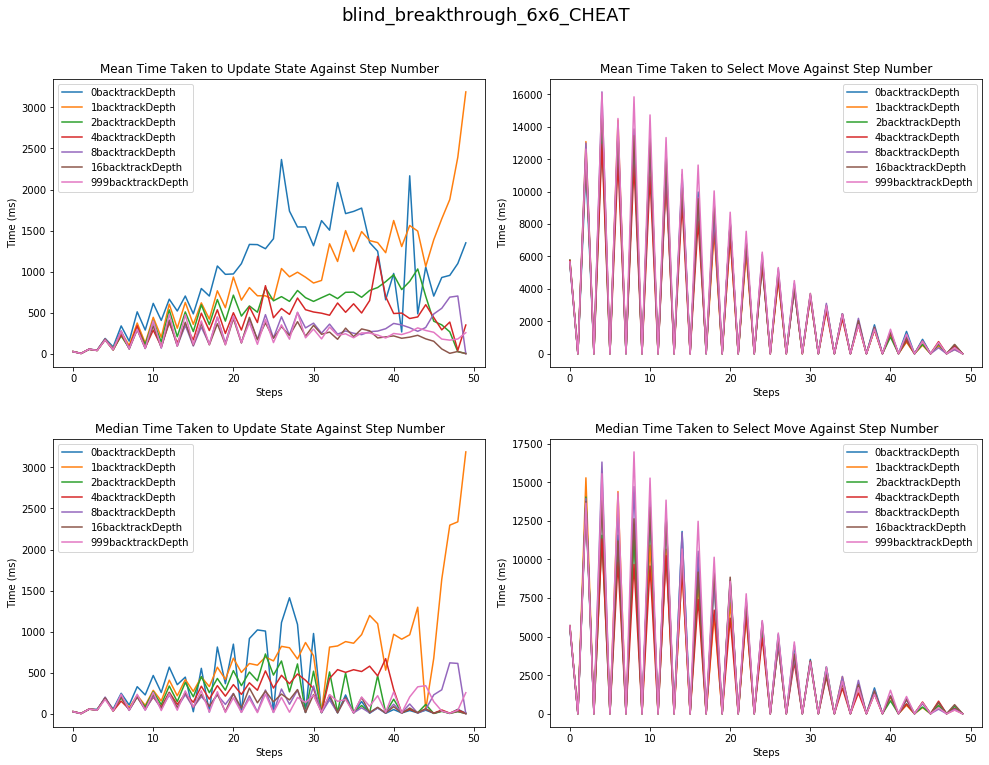

In [11]:
# Add the data to an array
mean_state_update_times = list()
mean_move_select_times = list()
median_state_update_times = list()
median_move_select_times = list()
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    temp_mean_state_update_times = list()
    temp_mean_move_select_times = list()
    temp_median_state_update_times = list()
    temp_median_move_select_times = list()
    for idx, (update_step, select_step) in enumerate(zip(game_time_to_update_list, game_time_to_select_move_list)):
        if idx < 50:
            temp_mean_state_update_times.append(update_step.getMeanTime())
            temp_mean_move_select_times.append(select_step.getMeanTime())
            temp_median_state_update_times.append(update_step.getMedianTime())
            temp_median_move_select_times.append(select_step.getMedianTime())
    mean_state_update_times.append(temp_mean_state_update_times)
    mean_move_select_times.append(temp_mean_move_select_times)
    median_state_update_times.append(temp_median_state_update_times)
    median_move_select_times.append(temp_median_move_select_times)

# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.5, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,1.25,1,1], label='state_update_mean')
ax1.set_title('Mean Time Taken to Update State Against Step Number')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('linear')
for idx, game_mean_state_update_times in enumerate(mean_state_update_times):
    ax1.plot(game_mean_state_update_times, label=str(numNames[idx]))
ax1.legend()

# Draw mean graph for Move Select
ax2 = fig.add_axes([1.15,1.25,1,1], label='move_select_mean')
ax2.set_title('Mean Time Taken to Select Move Against Step Number')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Time (ms)')
ax2.set_yscale('linear')
for idx, game_mean_move_select_times in enumerate(mean_move_select_times):
    ax2.plot(game_mean_move_select_times, label=str(numNames[idx]))
ax2.legend()

# Draw median graph for State Update
ax3 = fig.add_axes([0,0,1,1], label='state_update_median')
ax3.set_title('Median Time Taken to Update State Against Step Number')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Time (ms)')
ax3.set_yscale('linear')
for idx, game_median_state_update_times in enumerate(median_state_update_times):
    ax3.plot(game_median_state_update_times, label=str(numNames[idx]))
ax3.legend()

# Draw median graph for Move Select
ax4 = fig.add_axes([1.15,0,1,1], label='move_select_median')
ax4.set_title('Median Time Taken to Select Move Against Step Number')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Time (ms)')
ax4.set_yscale('linear')
for idx, game_median_move_select_times in enumerate(median_move_select_times):
    ax4.plot(game_median_move_select_times, label=str(numNames[idx]))
ax4.legend()

plt.show()

In [12]:
minimum = len(mean_state_update_times[0])
for game_mean_state_update_times in mean_state_update_times:
    minimum = min(minimum, len(game_mean_state_update_times))
print("Minimum: " + str(minimum) + "\n")
    
for idx, game_mean_state_update_times in enumerate(mean_state_update_times):
    print(str(numNames[idx]) + ": " + str(game_mean_state_update_times[:minimum]) + "\n")

Minimum: 50

0backtrackDepth: [31.22, 7.59, 57.28, 49.21, 189.34, 87.13, 341.99, 156.68, 513.3, 291.89, 616.1958762886597, 408.9166666666667, 666.7157894736843, 523.4835164835165, 705.4615384615385, 488.61538461538464, 796.8021978021978, 705.4269662921348, 1070.7191011235955, 969.1590909090909, 974.1976744186046, 1099.3647058823528, 1333.0357142857142, 1330.8313253012047, 1280.7283950617284, 1402.0384615384614, 2365.8533333333335, 1737.619718309859, 1545.2608695652175, 1545.8030303030303, 1317.015625, 1622.5, 1506.2363636363636, 2085.6603773584907, 1707.8823529411766, 1734.6739130434783, 1774.875, 1355.6857142857143, 1250.0357142857142, 659.7272727272727, 980.1666666666666, 268.5, 2167.3636363636365, 488.75, 1059.3333333333333, 704.6666666666666, 931, 956.8, 1100.4, 1352.25]

1backtrackDepth: [29.06, 7.55, 59.43, 44.2, 178.14, 66.47, 270.01, 103.24489795918367, 377.21276595744683, 133.31521739130434, 446.80434782608694, 204.62637362637363, 605.7252747252747, 313.8901098901099, 627.5666

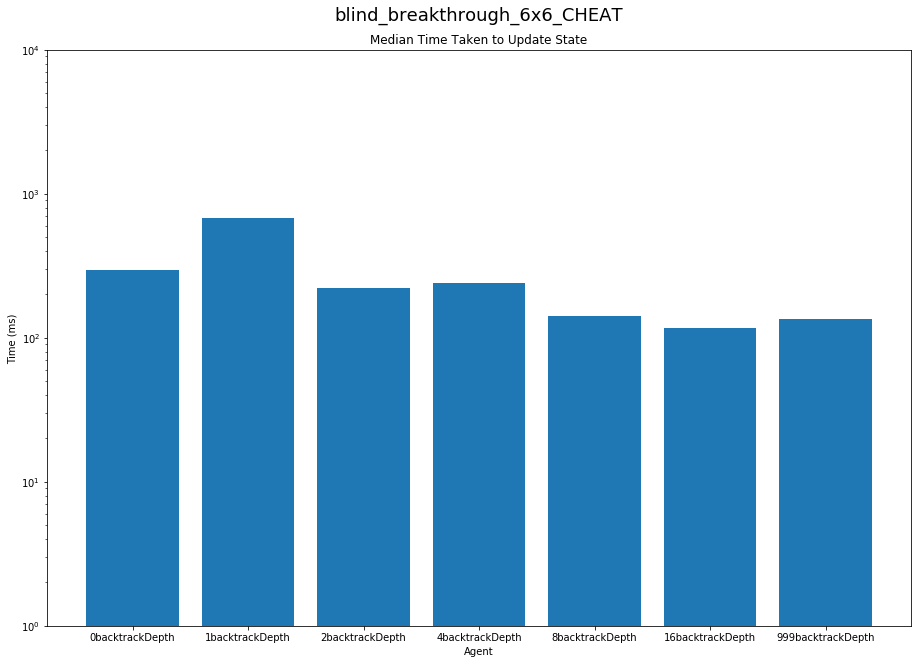

[294.38, 673.98, 220.84, 240.45, 141.46, 116.28, 135.94]

In [13]:
sum_game_median_state_update_times = list()
for idx, game_median_state_update_times in enumerate(median_state_update_times):
    sum_game_median_state_update_times.append(sum(game_median_state_update_times)/len(game_median_state_update_times))
    
# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.15, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Median Time Taken to Update State')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
ax1.set_ylim([1,10000])
ax1.bar(numNames, sum_game_median_state_update_times)

plt.show()
    
sum_game_median_state_update_times

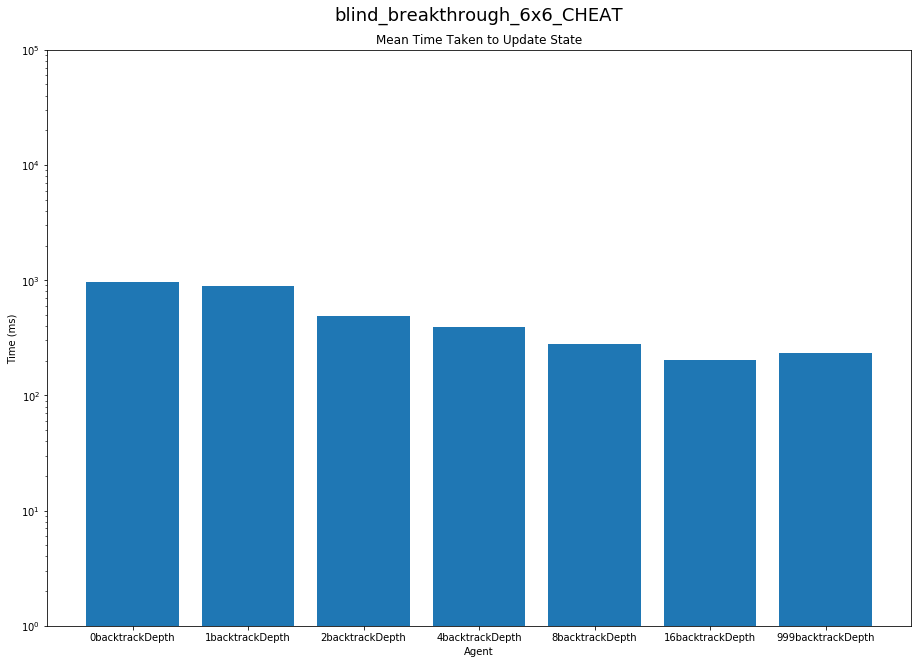

[966.3076398484899,
 891.4686726637493,
 490.81688906309154,
 392.55709989628764,
 277.49418590425705,
 204.55889662724468,
 231.15222234041022]

In [14]:
sum_game_mean_state_update_times = list()
for idx, game_mean_state_update_times in enumerate(mean_state_update_times):
    sum_game_mean_state_update_times.append(sum(game_mean_state_update_times)/len(game_mean_state_update_times))
    
# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.15, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Mean Time Taken to Update State')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
ax1.set_ylim([1,100000])
ax1.bar(numNames, sum_game_mean_state_update_times)

plt.show()
    
sum_game_mean_state_update_times

Note: The above graph takes into account the possible variance in the number of steps.

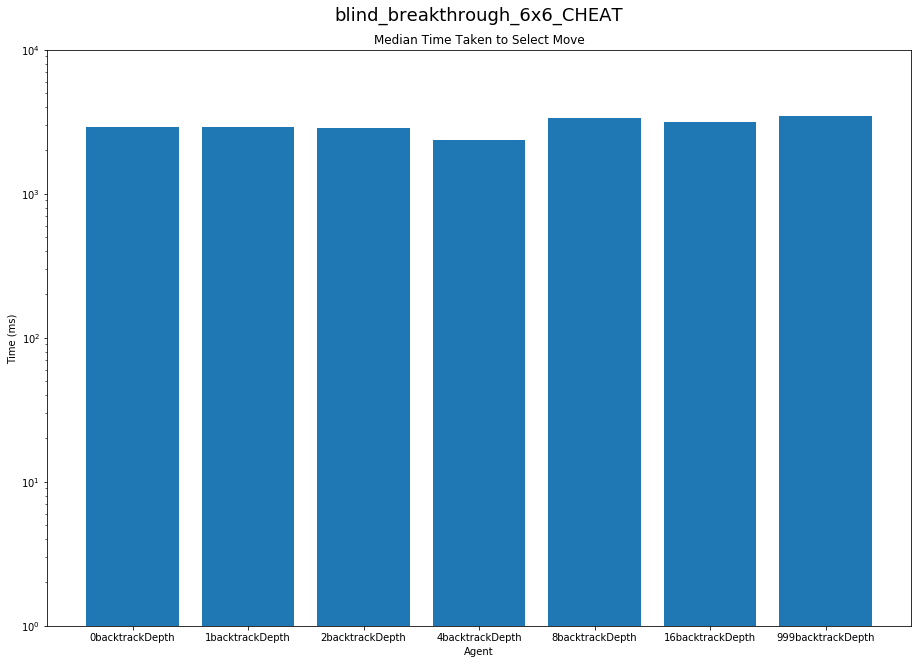

In [17]:
sum_game_median_move_select_times = list()
for idx, game_median_move_select_times in enumerate(median_move_select_times):
    sum_game_median_move_select_times.append(sum(game_median_move_select_times)/len(game_median_move_select_times))
    
# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.15, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Median Time Taken to Select Move')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
ax1.set_ylim([1,10000])
ax1.bar(numNames, sum_game_median_move_select_times)

plt.show()
    
# sum_game_mean_state_update_times

### Hypergame Utilization

I will now consider how useful increasing the cap of hypergames was

Minimum: 50



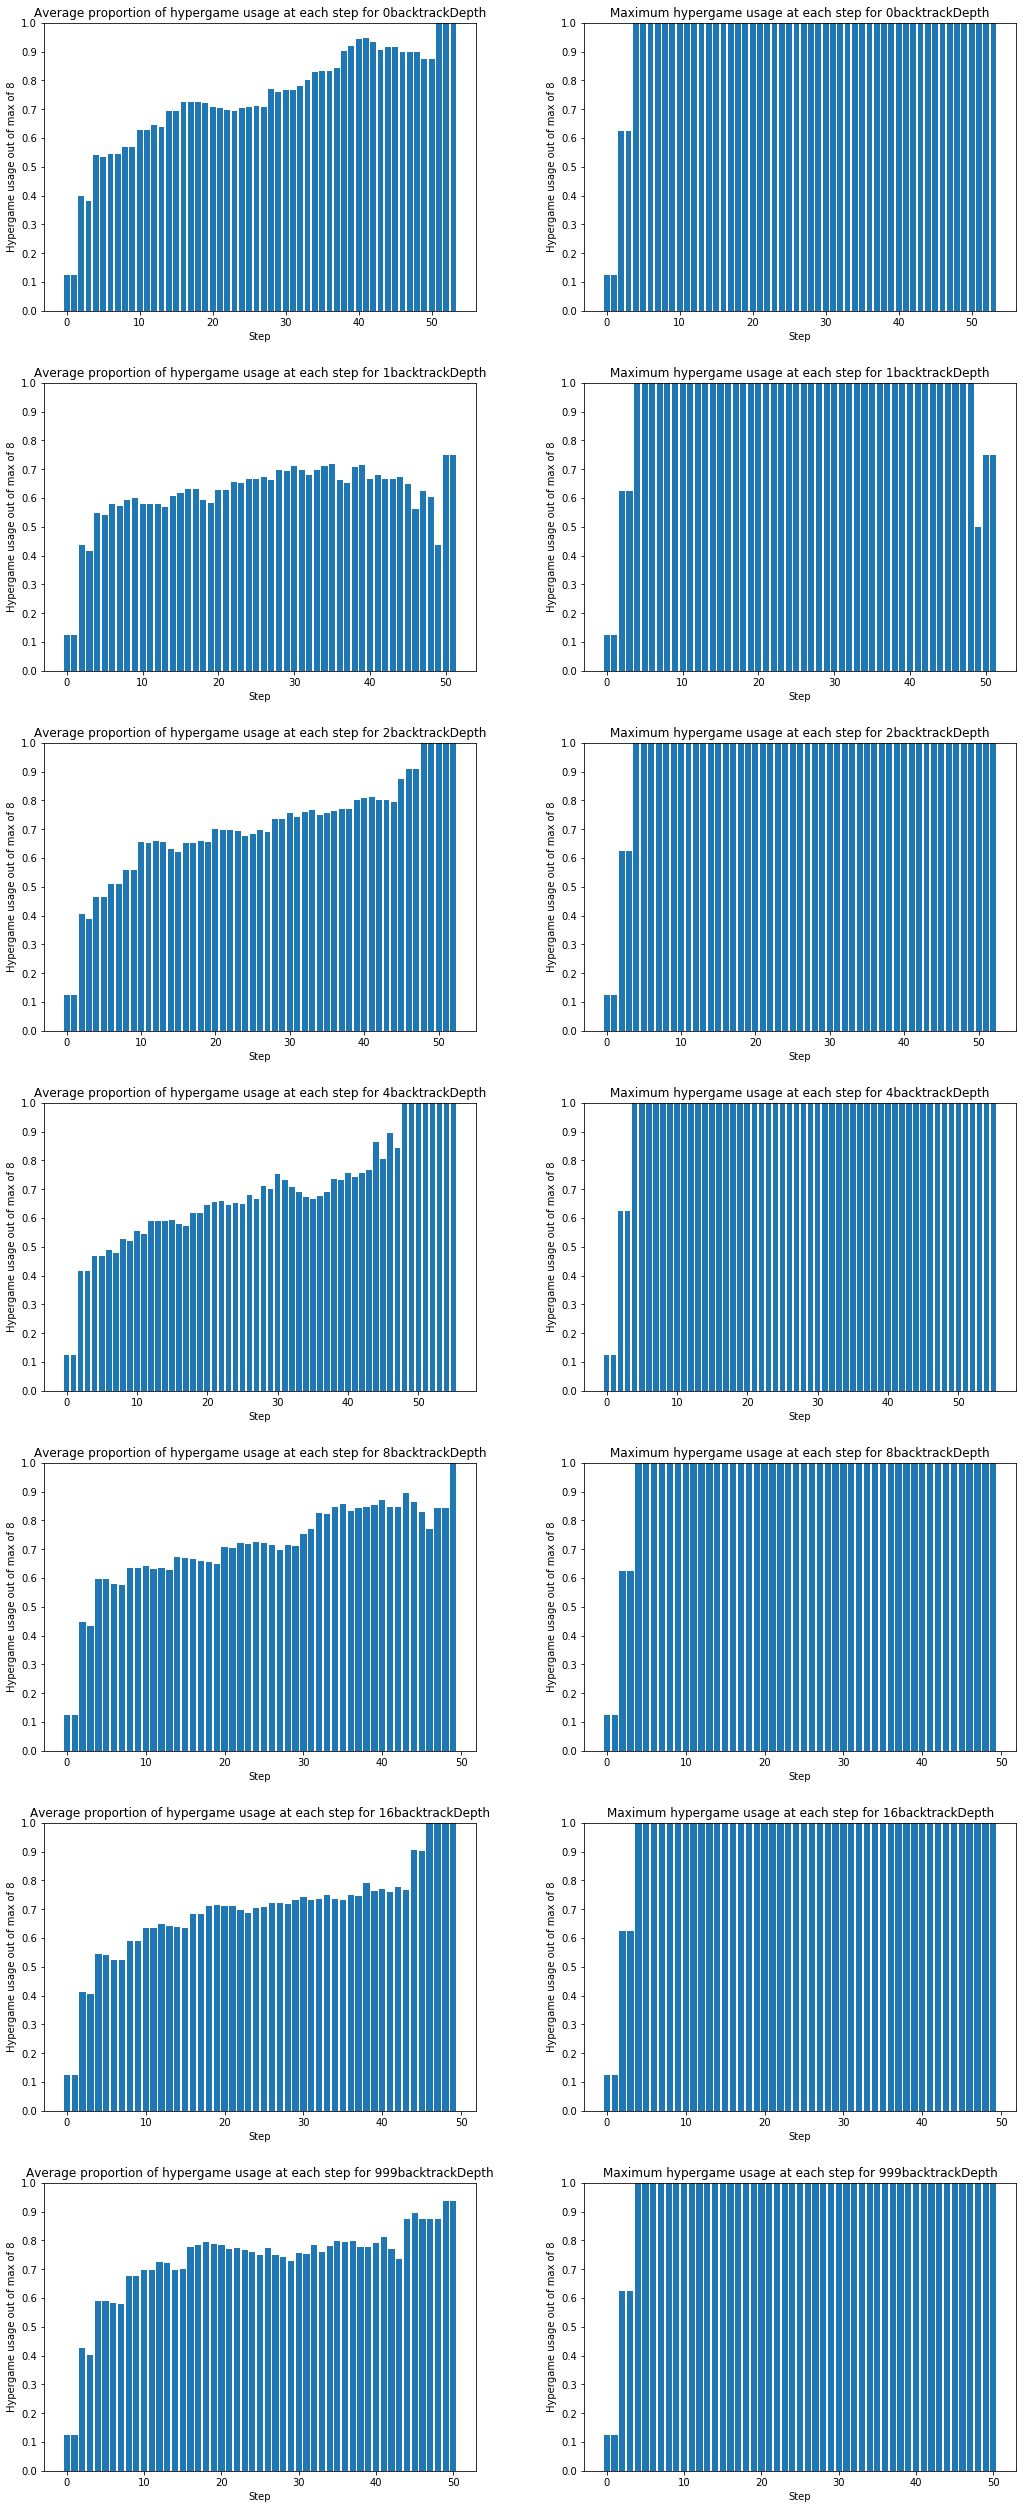

[0.125,
 0.125,
 0.4201785714285714,
 0.4057142857142857,
 0.53625,
 0.5339285714285714,
 0.5446428571428571,
 0.5404094827586207,
 0.5925655976676385,
 0.5925586510263929,
 0.6272288261515602,
 0.624064371257485,
 0.6403409090909091,
 0.6343941717791411,
 0.6465384615384615,
 0.646585557299843,
 0.6732142857142858,
 0.6716988727858293,
 0.6788336052202284,
 0.675376254180602,
 0.696763202725724,
 0.6950954861111112,
 0.6992119089316988,
 0.6933664259927798,
 0.6977818853974121,
 0.6977186311787072,
 0.709387159533074,
 0.698469387755102,
 0.7272964509394572,
 0.7238307349665924,
 0.7482758620689656,
 0.7419950738916257,
 0.7522551546391752,
 0.7538194444444445,
 0.7597597597597597,
 0.7641666666666667,
 0.7572463768115942,
 0.7615,
 0.7868303571428571,
 0.7912303664921466,
 0.7958579881656804,
 0.7928082191780822,
 0.7827868852459017,
 0.7838541666666666,
 0.8327922077922078,
 0.8289473684210527,
 0.8352272727272727,
 0.84375,
 0.8625,
 0.8970588235294118]

In [17]:
max_hypergames = 8

hypergame_utilization_sum = list()
hypergame_utilization_max = list()
hypergame_utilization_count = list()
hypergame_utilization = list()

fig = plt.figure()


minimum = min(max_num_steps)
print("Minimum: " + str(minimum) + "\n")

hypergame_utilization_sum_overall = [0] * minimum
hypergame_utilization_count_overall = [0] * minimum
for idx, move_list in enumerate(move_list_games):
    hypergame_utilization_sum.append([0] * max_num_steps[idx])
    hypergame_utilization_max.append([0] * max_num_steps[idx])
    hypergame_utilization_count.append([0] * max_num_steps[idx])
    hypergame_utilization.append([])

    # Count number of hypergames used on average at each step out of the maximum number
    for game in move_list:
        for index, row in game.iterrows():
            if(row['player_name'] == 'ahyperlt'):
                hypergame_utilization_sum[idx][row['step']] += row['count_hypergames']
                hypergame_utilization_count[idx][row['step']] += 1
                if row['step'] < minimum:
                    hypergame_utilization_sum_overall[row['step']] += row['count_hypergames']
                    hypergame_utilization_count_overall[row['step']] += 1
                if(row['count_hypergames'] / max_hypergames > hypergame_utilization_max[idx][row['step']]):
                    hypergame_utilization_max[idx][row['step']] = row['count_hypergames'] / max_hypergames
    hypergame_utilization[idx] = [(utilSum / count) / max_hypergames for utilSum, count in zip(hypergame_utilization_sum[idx], hypergame_utilization_count[idx])]

    # display
    
    ax1 = fig.add_axes([0,-idx - idx*0.25,1,1])
    ax1.set_title('Average proportion of hypergame usage at each step for ' + str(numNames[idx]))
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Hypergame usage out of max of ' + str(max_hypergames))
    ax1.set_yscale('linear')
    ax1.set_yticks(np.linspace(0,1,11))
    ax1.set_ylim([0,1])
    ax1.bar(range(0, len(hypergame_utilization[idx])), hypergame_utilization[idx])

    ax2 = fig.add_axes([1.25,-idx  - idx*0.25,1,1])
    ax2.set_title('Maximum hypergame usage at each step for ' + str(numNames[idx]))
    ax2.set_xlabel('Step')
    ax2.set_ylabel('Hypergame usage out of max of ' + str(max_hypergames))
    ax2.set_yscale('linear')
    ax2.set_yticks(np.linspace(0,1,11))
    ax2.set_ylim([0,1])
    ax2.bar(range(0, len(hypergame_utilization_max[idx])), hypergame_utilization_max[idx])

plt.show()

[(x/y)/max_hypergames for x, y in zip(hypergame_utilization_sum_overall, hypergame_utilization_count_overall)]

### Average Number of Steps Taken to Win

This is another way to determine quality of play - a stronger opponent would likely take less turns to win when all else is equal.

0backtrackDepth
	Mean steps to win: 31
	Median steps to win: 33
1backtrackDepth
	Mean steps to win: 30
	Median steps to win: 32.0
2backtrackDepth
	Mean steps to win: 33
	Median steps to win: 35
4backtrackDepth
	Mean steps to win: 31
	Median steps to win: 31
8backtrackDepth
	Mean steps to win: 31
	Median steps to win: 31.0
16backtrackDepth
	Mean steps to win: 34
	Median steps to win: 35.0
999backtrackDepth
	Mean steps to win: 31
	Median steps to win: 31.0


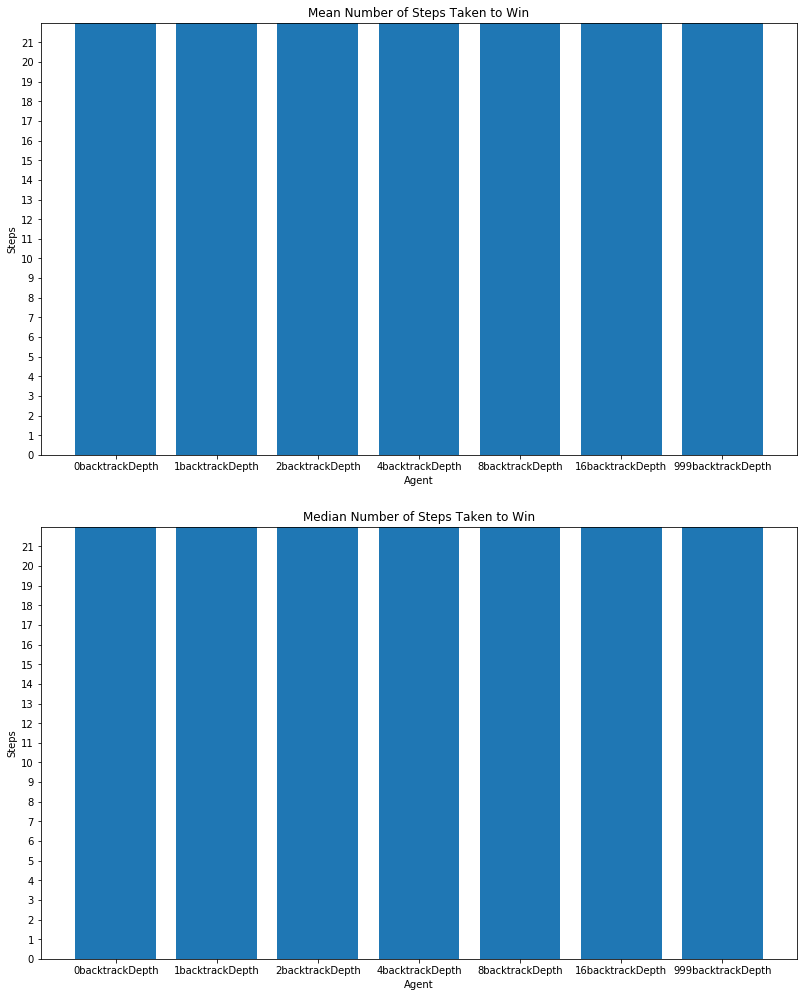

In [19]:
# Calculate the average number of steps taken to win for each hypergame
steps_to_win_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    game_steps_to_win_list = list()
    winning_games = game[((game['player_1_score'] == 100) & (game['player_2_score'] == 0))] 
    winning_games_list = winning_games['match_id'].tolist()
    for moves in move_list:
        if(moves['match_id'][0] in winning_games_list):
            move_length = len(moves['match_id'])
            game_steps_to_win_list.append(moves['step'][move_length - 1] + 1)
    steps_to_win_list.append(game_steps_to_win_list)

# Print steps to win
mean_steps_to_win = list()
median_steps_to_win = list()
for idx, game_steps_to_win in enumerate(steps_to_win_list):
    mean = statistics.mean(game_steps_to_win)
    median = statistics.median(game_steps_to_win)
    print(f'{numNames[idx]}')
    print(f'\tMean steps to win: {mean}')
    print(f'\tMedian steps to win: {median}')
    mean_steps_to_win.append(mean)
    median_steps_to_win.append(median)

# Graph steps to win
fig = plt.figure()
ax1 = fig.add_axes([0,0,1.75,1.5])
ax1.set_title('Mean Number of Steps Taken to Win')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Steps')
ax1.set_yscale('linear')
ax1.set_yticks(range(0,22,1))
ax1.set_ylim([0,22])
ax1.bar(numNames, mean_steps_to_win)

ax2 = fig.add_axes([0,-1.75,1.75,1.5])
ax2.set_title('Median Number of Steps Taken to Win')
ax2.set_xlabel('Agent')
ax2.set_ylabel('Steps')
ax2.set_yscale('linear')
ax2.set_yticks(range(0,22,1))
ax2.set_ylim([0,22])
ax2.bar(numNames, median_steps_to_win)

plt.show()

There seems to be an interesting pattern in that searching a little can help finish games faster, but can also lead to longer games taking place. This could alternatively be read that some backtracking allows previously unwinnable games to be won.

Further analysis is required.

0backtrackDepth
	Mean steps to win: 32
	Median steps to win: 35.0
1backtrackDepth
	Mean steps to win: 30
	Median steps to win: 32.0
2backtrackDepth
	Mean steps to win: 33
	Median steps to win: 35.0
4backtrackDepth
	Mean steps to win: 32
	Median steps to win: 33.0
8backtrackDepth
	Mean steps to win: 32
	Median steps to win: 33.0
16backtrackDepth
	Mean steps to win: 33
	Median steps to win: 35.0
999backtrackDepth
	Mean steps to win: 30
	Median steps to win: 32.5


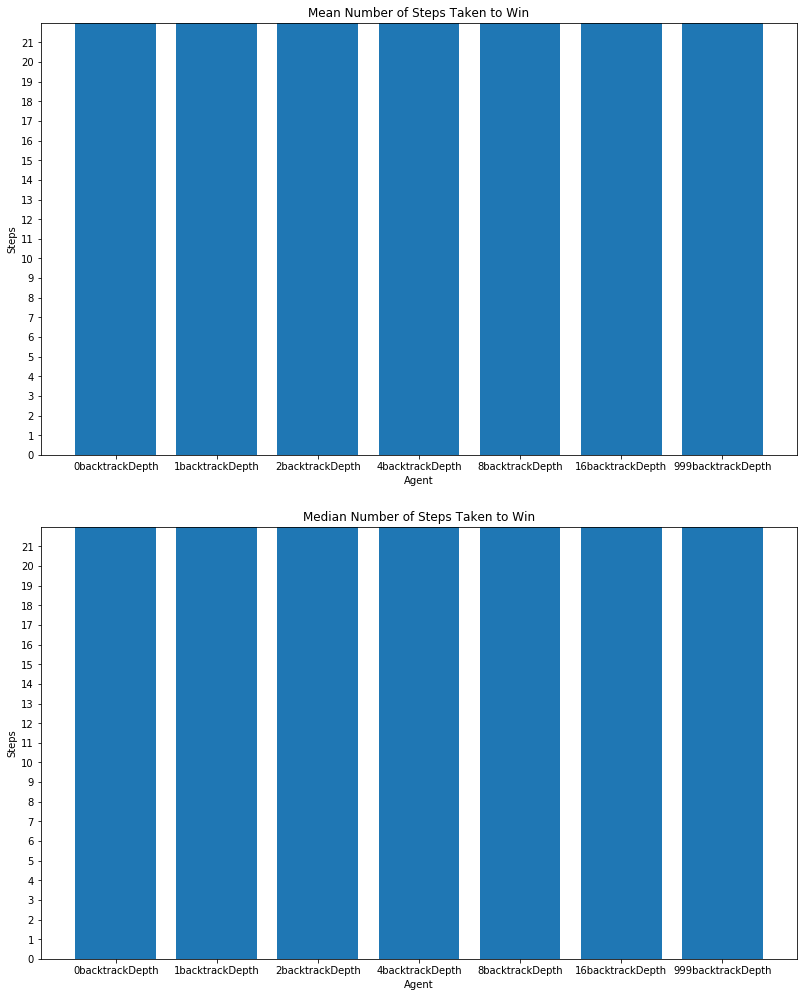

In [20]:
# Calculate the average number of steps taken to win for each hypergame
steps_to_win_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    game_steps_to_win_list = list()
    winning_games = game[((game['player_1_score'] == 100) & (game['player_2_score'] == 0)) | (len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 100)| (game['player_1_score'] == 50) & (game['player_2_score'] == 50)]))] 
    winning_games_list = winning_games['match_id'].tolist()
    for moves in move_list:
        if(moves['match_id'][0] in winning_games_list):
            move_length = len(moves['match_id'])
            game_steps_to_win_list.append(moves['step'][move_length - 1] + 1)
    steps_to_win_list.append(game_steps_to_win_list)

# Print steps to win
mean_steps_to_win = list()
median_steps_to_win = list()
for idx, game_steps_to_win in enumerate(steps_to_win_list):
    mean = statistics.mean(game_steps_to_win)
    median = statistics.median(game_steps_to_win)
    print(f'{numNames[idx]}')
    print(f'\tMean steps to win: {mean}')
    print(f'\tMedian steps to win: {median}')
    mean_steps_to_win.append(mean)
    median_steps_to_win.append(median)

# Graph steps to win
fig = plt.figure()
ax1 = fig.add_axes([0,0,1.75,1.5])
ax1.set_title('Mean Number of Steps Taken to Win')
ax1.set_xlabel('Agent')
ax1.set_ylabel('Steps')
ax1.set_yscale('linear')
ax1.set_yticks(range(0,22,1))
ax1.set_ylim([0,22])
ax1.bar(numNames, mean_steps_to_win)

ax2 = fig.add_axes([0,-1.75,1.75,1.5])
ax2.set_title('Median Number of Steps Taken to Win')
ax2.set_xlabel('Agent')
ax2.set_ylabel('Steps')
ax2.set_yscale('linear')
ax2.set_yticks(range(0,22,1))
ax2.set_ylim([0,22])
ax2.bar(numNames, median_steps_to_win)

plt.show()

It seems there isn't a particularly strong correlation when considering wins OR draws

### Time Taken to Restart from Root

I will now investigate the number of times each algorithm ran out out valid hypergames and had to start from the root

In [21]:
times_searched_from_root_per_agent = list()
times_searched_from_root_per_agent_count = list()
for idx, move_list in enumerate(move_list_games):
    times_searched_from_root_per_game = list()

    # Count number of hypergames used on average at each step out of the maximum number
    for game in move_list:
        times_searched_from_root = 0
        for index, row in game.iterrows():
            if(row['player_name'] == 'ahyperlt' and row['times_searched_from_root'] > 0):
                times_searched_from_root += row['times_searched_from_root']
        times_searched_from_root_per_game.append(times_searched_from_root)
    times_searched_from_root_per_agent_count.append(sum(times_searched_from_root_per_game))
    times_searched_from_root_per_agent.append(times_searched_from_root_per_game)

times_searched_from_root_per_agent_count

KeyError: 'times_searched_from_root'

It can be seen that with up to 32 hypergames and 32 simulations per hypergame, even with no backtracking, there was never a time where the hypergames were all removed and the search had to start from the root. This is further evidence that backtracking doesn't assist as much as initially expected.

## Conclusion

It seems to me that some backtracking is worth doing (1 or 2 levels) since it allows the game to be completed quicker, however it doesn't seem to have a strong correlation with winning after this.
Additionally, further backtracking increases the time taken to update the state exponentially so it isn't worth doing particularly for larger games.

Refer to the notebook 'TestAnalysisImprovedUpdateState' to see that there was a 300x increase in the time taken to update with full backtracking vs 1 depthBacktracking for the game KriegTTT_5x5. The data could be interpreted such that the change led to a lower win-rate, but this seems to be compensated for by the fact that full algorithm would time out after step 6 by taking more than 5 minutes to calculate a move.

In [15]:
expected_depth_list = [2, 4, 8, 16, 32]
median_depth_list = list()
mean_depth_list = list()
for idx, move_list in enumerate(move_list_games):
    average_depth_instances = list()
    for i, move_set in enumerate(move_list):
        count = 0
        for index, move_row in move_set.iterrows():
            if move_row['player_name'] == 'ahyperlt':
                num_probes = move_row['num_probes']
                if move_row['num_probes'] == 'null':
                    print("found null")
                    num_probes = 0
                if move_row['step'] != count:
                    for ii in range(0, move_row['step'] - count):
                        average_depth_instances.append(0)
                average_depth_instances.append(num_probes)
                count = move_row['step'] + 1
    median_depth_list.append(statistics.median(average_depth_instances))
    mean_depth_list.append(statistics.mean(average_depth_instances))

print(mean_depth_list)

[8, 8, 8, 8, 8, 8, 8]


In [16]:
expected_hypergame_list = [4, 4, 4, 4, 4]
median_hypergame_list = list()
mean_hypergame_list = list()
for idx, move_list in enumerate(move_list_games):
    hypergame_instances = list()
    for i, move_set in enumerate(move_list):
        for index, move_row in move_set.iterrows():
            if move_row['player_name'] == 'ahyperlt':
                hypergame_instances.append(move_row['count_hypergames'])
    median_hypergame_list.append(statistics.median(hypergame_instances))
    mean_hypergame_list.append(statistics.mean(hypergame_instances))

print(mean_hypergame_list)

[5.104970669959864, 4.669597989949748, 4.922295277943814, 4.567108917000926, 5.121776949363157, 5.003277711561383, 5.31344262295082]
